**İleri Seviye Müşteri Segmentasyonu Projesi**

Bu projemizde Massachussets Institute of Technology (MIT) tarafından geliştirilmiş ileri seviye bir kütüphane kullanacağız.
Verilerimiz komplex olduğu için  burada K-Means kullanamıyoruz.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
#kmodes kütüphanesi standart distribution içinde gelmez sizin istall etmeniz gerekebilir.
#Massachusetts Instute of Technology (MIT) tarafından geliştirilmiş ileri seviye bir kütüphanedir.
#https://anaconda.org/conda-forge/kmodes linkinde detay mevcuttur
#conda install -c conda-forge kmodes komutu ile Anaconda üzerinde kurabilirsiniz...
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [4]:
df = pd.read_csv("segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [6]:
#verisetimizde null data varmı diye kontrol ediyoruz
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
#Income ve Age Data Normalization

#Ölçekleme/Normalleştirmeden önce normal değerlerimizi geçici değişkenlerde tutuyoruz
df_temp = df[['ID','Age','Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [9]:
#analizden önce ID sütününu siliyoruz
df = df.drop(['ID'], axis=1)

In [10]:
mark_array = df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [11]:
#Build our model...

kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 716, ncost: 166.94654936216804
Run: 1, iteration: 2/20, moves: 270, ncost: 165.4684938803408
Run: 1, iteration: 3/20, moves: 85, ncost: 165.11906262971152
Run: 1, iteration: 4/20, moves: 9, ncost: 165.11645630641777
Run: 1, iteration: 5/20, moves: 0, ncost: 165.11645630641777
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 618, ncost: 175.93276857836605
Run: 2, iteration: 2/20, moves: 233, ncost: 169.27747949503276
Run: 2, iteration: 3/20, moves: 51, ncost: 168.92448219409863
Run: 2, iteration: 4/20, moves: 18, ncost: 168.79614817517165
Run: 2, iteration: 5/20, moves: 15, ncost: 168.78885732329624
Run: 2, iteration: 6/20, moves: 8, ncost: 168.77860964219335
Run: 2, iteration: 7/20, moves: 13, ncost: 168.76191918423257
Run: 2, iteration: 8

10

In [12]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

df['cluster']=cluster_dict

#temp'deki orijinal sütunları df'ye koy:
df[['ID','Age','Income']] = df_temp

In [13]:
df[df['cluster']==0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
17,0,0,25,0,157434,1,2,0,100000018
19,0,0,31,0,144657,1,1,0,100000020
31,0,0,27,0,120131,1,1,0,100000032
32,0,0,30,0,162745,1,2,0,100000033
36,0,0,31,0,143385,1,2,0,100000037
39,0,0,24,0,92542,1,1,0,100000040
52,0,0,25,0,92058,1,2,0,100000053
53,0,0,31,0,117158,1,0,0,100000054
63,0,0,25,0,227385,1,2,0,100000064
88,0,0,30,0,149022,2,2,0,100000089


C:\Users\AHMET\AppData\Local\Temp\ipykernel_5440\471556968.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


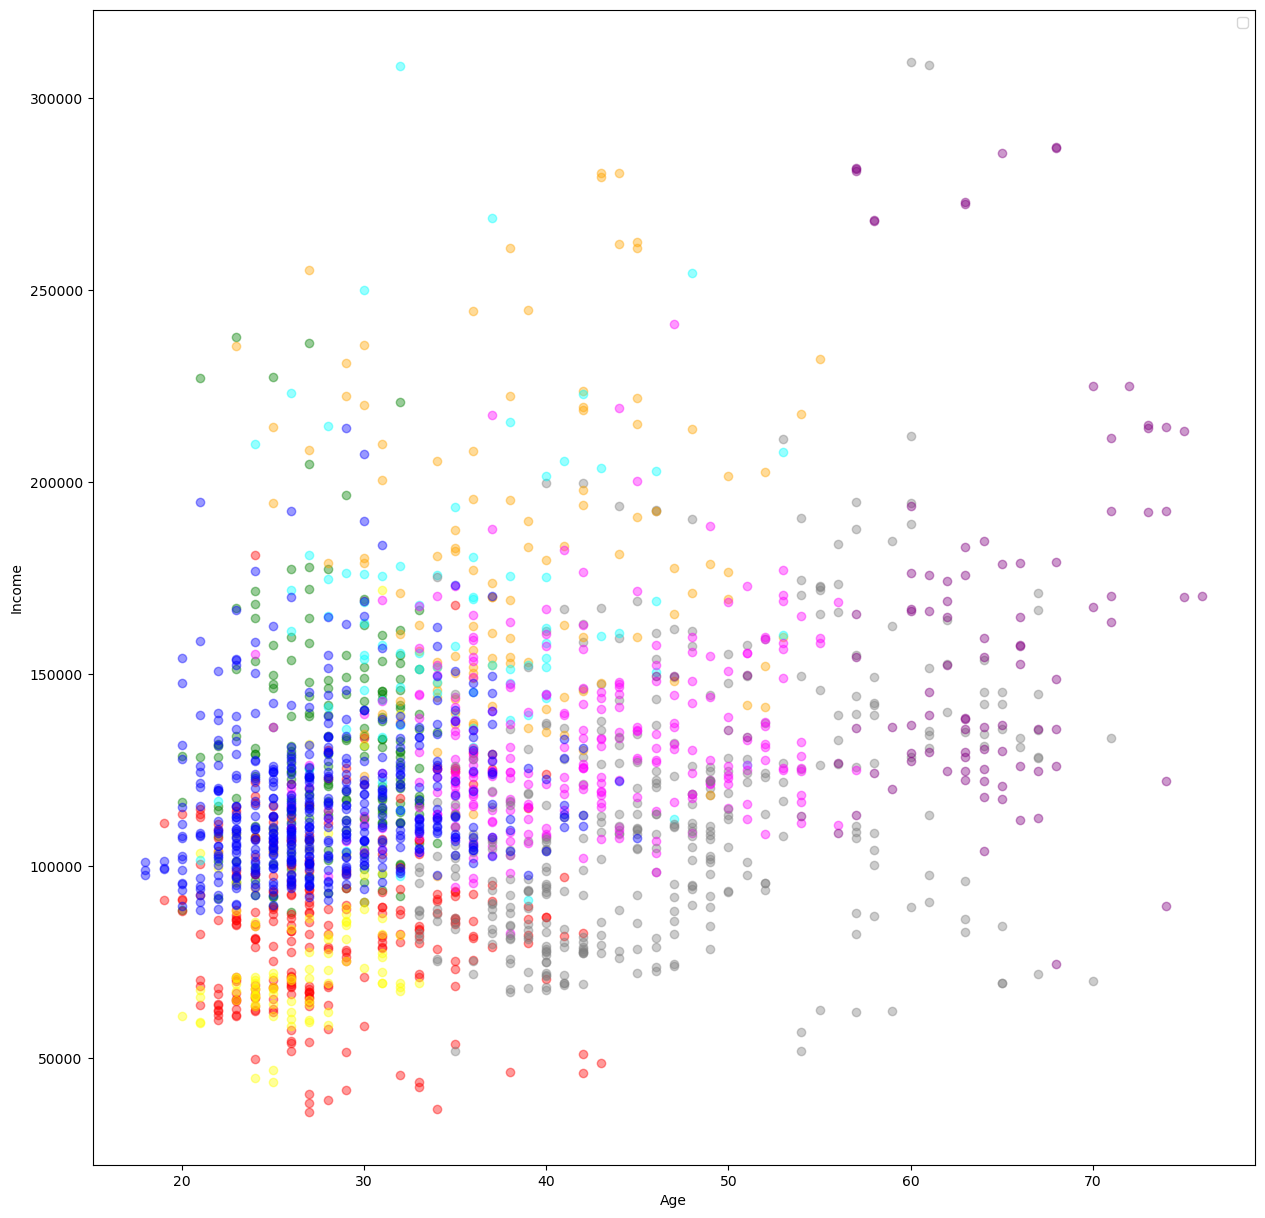

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]
df8 = df[df.cluster==7]
df9 = df[df.cluster==8]
df10 = df[df.cluster==9]
df11 = df[df.cluster==10]

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'], color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'], color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'], color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'], color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'], color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'], color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'], color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'], color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'], color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'], color='blue', alpha = 0.4)

plt.legend()
plt.show()